혼자 공부하는 머신러닝+딥러닝 7장
- 딥러닝 시작

# 7-1. 인공 신경망

텐서플로의 케라스 패키지 임포트 및 패션 MNIST 데이터 다운

In [30]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듦.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [31]:
# load_data() 함수는 훈련 데이터와 테스트 데이터 나누어 반환
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [32]:
# 전달받은 데이터의 크기 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [33]:
# 테스트 데이터의 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


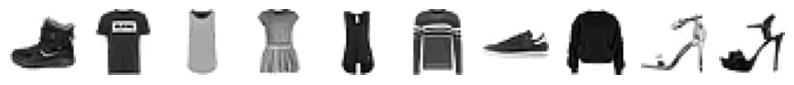

In [34]:
# 훈련 데이터에서 몇 개의 샘플 그림으로 확인
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [35]:
# 타깃값 확인
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


패션 MNIST에 포함된 10개 레이블의 의미
- 0: 티셔츠, 1: 바지, 2: 스웨터, 3: 드레스, 4: 코트, 5: 샌달, 6: 셔츠, 7: 스니커즈, 8: 가방, 9: 앵클 부츠

In [36]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기
- 샘플이 60,000개나 되기 때문에 한꺼번에 데이터를 사용하기보다는 샘플을 하나씩 꺼내서 사용 = '확률적 경사 하강법'
- -> SGDClassifier는 2차원 입력을 못 다루므로 샘플을 1차원 배열로 만들어야함
- MNIST의 경우 각 픽셀은 0~255 사이의 정숫값을 가짐. -> 255로 나누어 0~1 사이의 값으로 정규화

In [37]:
print(train_input[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [38]:
# 배열 255로 나누어 0~1값으로 정규화 및 2차원 -> 1차원
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [39]:
print(train_scaled[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [40]:
print(train_scaled.shape)

(60000, 784)


In [41]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


+) cross_validate의 반환값 (딕셔너리)
- fit_time: 각 교차 검증에서 모델 훈련에 걸린 시간.
- score_time: 점수 계산에 걸린 시간.
- test_score: 각 교차 검증 반복에서의 테스트 점수.
- train_score (선택): 각 교차 검증 반복에서의 훈련 점수(추가하려면 return_train_score=True).

로지스틱 회귀 공식
- z_티셔츠 = w1 x (픽셀1) + w2 x (픽셀2) + ... + w784 x (픽셀784) +b

- z_바지 = w1 x (픽셀1) + w2 x (픽셀2) + ... + w784 x (픽셀784) +b


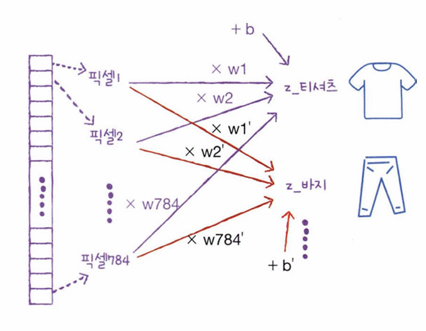

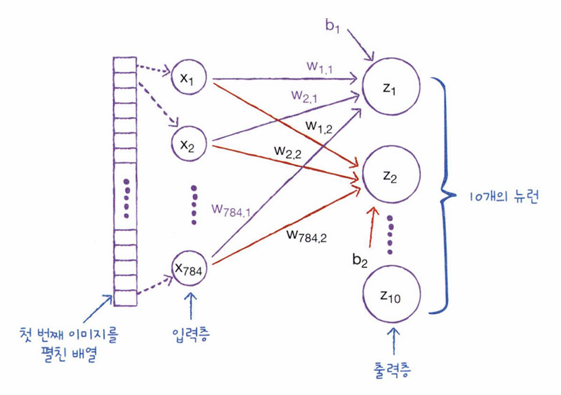

- 클래스가 총 10개이므로 z10까지 계산함. 이를 바탕으로 클래스를 예측하고, 이것을 출력층이라고 함.
- 픽셀 = x1, x2 ... = 입력층
- -> 매컬러-피츠 뉴런
- z1을 만들기 위해 픽셀1인 x1에 곱해지는 가중치는 w1,1
- z2를 만들기 위해 픽셀1인 x1에 곱해지는 가중치는 w1,2

텐서플로와 케라스
- 텐서플로: 딥러닝 라이브러리 (GPU 사용, 코랩에서도 가능)
- 케라스: 텐서플로의 고수준 API


In [42]:
import tensorflow as tf

In [43]:
from tensorflow import keras

## 인공 신경망으로 모델 만들기
- 로지스틱 회귀(머신러닝)에서는 교차 검증 사용했지만, 인공 신경망(딥러닝)에서는 교차 검증 사용하지 않고 검증 세트를 별도로 덜어내어 사용함.
- -> 오래 걸리고, 데이터셋이 충분히 커서 검증 점수가 안정적이기 때문임.

In [44]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [45]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [46]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


밀집층 (=완전 연결층)
- Dense 클래스를 사용해 밀집층 생성
- 매개변수는 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기
- -> 여기서는 10개의 클래스(다중 분류)이므로 소프트맥스 사용, 만약 이진 분류라면 시그모이드 함수 사용

In [47]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# 위에서 생성한 밀집층을 가진 신경망 모델 생성 (sequentail 클래스 사용)
model = keras.Sequential([dense])

위의 그림에서 z(출력층)에서 끝내는 게 아니라 이것을 소프트 맥스 함수에 넣어 다시 a1~a10으로 출력

## 인공 신경망으로 패션 아이템 분류하기
- 케라스 모델은 훈련 하기 전에 설정 단계가 있음.
- 이런 설정을 model 객체의 compile() 메서드에서 수행함
- 손실 함수의 종류를 꼭 지정하고, 그다음 훈련 과정에서 계산하고 싶은 측정값을 지정함
-
- 4장의 이진 분류에서 이진 크로스 엔트로피 손실 함수, 다중 분류에서는 크로스 엔트로피 손실 함수 사용했음
- 케라스에서는 이진 분류를 binary_crossentropy, 다중 분류를 categorical_crossentropy로 나누어 봄
- sparse는 타깃값은 원-핫 인코딩으로 바꾸지 않고, 정수로 된 타깃값을 그냥 사용할 수 있음.
- 여기서, 클래스 타깃값이 티셔츠:0, 바지:1 ... 9 까지 정수값으로 되어있는데, 티셔츠일 경우 [1, 0, 0, 0, .. ,0](원-핫 인코딩)을 굳이 안 해도 된다는 말!
- -> 나머지를 0으로 두지 않고 직접 값을 사용하는 이유는 티셔츠인 값만 고려하고 나머지는 고려하지 않으면 함수가 해당 확률만을 기준으로 작동함. 이렇게 되면 다중 클래스 분류 문제에서 각 클래스 간의 관계를 학습하는 데 부족함.


In [49]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
# 타깃값이 어떻게 구성되어있는지 확인
# 원래는 0과 1로 원-핫 인코딩 해야하는데 sparse 쓰면 0~9 등 정수값 그대로 써도 됨
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [51]:
# epochs=5로 설정하여 가중치와 편향을 업데이트하고 손실 값 감소하도록 함 = 모델 성능 향상
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8537 - loss: 0.4337


In [52]:
# 검증 세트로 모델의 성능 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8462 - loss: 0.4364


[0.44444453716278076, 0.8458333611488342]

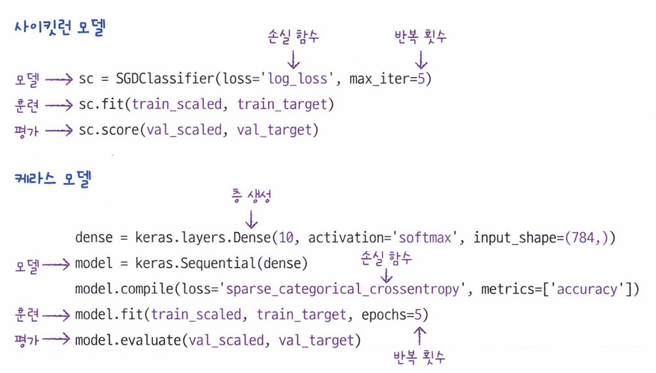

# 7-2. 심층 신경망
- 인공 신경망에 층 여러 개 추가

## 2개의 층

In [53]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [54]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [55]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

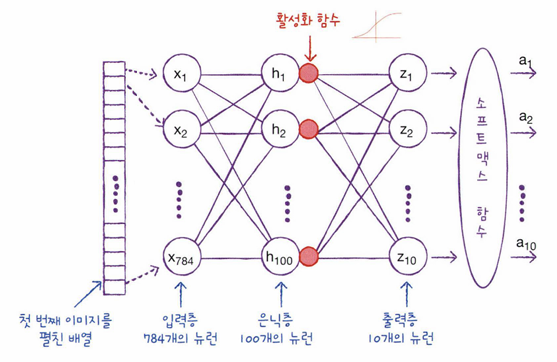

- 은닉층: 입력층과 출력층 사이에 있는 층
- 은닉층에는 주황색 원으로 활성화 함수 표시되어있음. 신경망 층의 선형 장벙식의 계산 값에 적용하는 함수(소프트 맥스, 시그모이드 등)

In [56]:
# 은닉층의 뉴런 개수는 기준 x, 대신 출력층의 뉴런보다는 많게 생성 (여기서는 100개)
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망 만들기

In [57]:
model = keras.Sequential([dense1, dense2])

In [58]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- -> None인 이유는 데이터를 한 번에 모두 사용하지 않고, 미니배치 경사 하강법을 사용하기 때문.
- -> 파라미터 개수는 가중치 784 x 100 = 78,400개와 뉴런마다 절편이 1개 있어서 1 x 100 = 100개로 은닉층까지는 78,500개임. 그리고, 다음 층에서 가중치 100 x 10 = 1,000와 절편 1 x 10 = 10으로 1,010개로 총 79,510개가 됨.


## 층을 추가하는 다른 방법
1)
- dense를 따로 만들지 않고, sequentail 클래스의 생성자 안에서 바로 dense 클래스의 객체 만듦
- 모델과 층 이름까지 설정 가능

In [59]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [60]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

2)
- dense 클래스의 객체를 따로 변수에 담지 않고 add() 메서드로 전달

In [61]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [62]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7525 - loss: 0.7720
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8463 - loss: 0.4270
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8604 - loss: 0.3857
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8696 - loss: 0.3600
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8759 - loss: 0.3410


## 렐루 함수
- 입력이 양수일 경우 입력을 그냥 통과시키고, 음수일 경우에는 0으로 만듦
- max(0, z)


In [64]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # reshape을 이용하여 1차원으로 바꿨지만, flatten 클래스 사용 가능
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [67]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7637 - loss: 0.6723
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8515 - loss: 0.4054
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8676 - loss: 0.3595
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8786 - loss: 0.3344
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8858 - loss: 0.3177


In [68]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8671 - loss: 0.3837


[0.3847014605998993, 0.8665000200271606]

## 옵티마이저
- 하이퍼파라미터: 모델이 학습하지 않아 사람이 지정해주어야 하는 파라미터(은닉층의 개수, 은닉층의 뉴런 개수, fit() 메서드의 batch_size 매개변수)
- compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용했음. 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공하는데, 이걸 옵티마이저라고 함.
- SGD 옵티마이저를 사용하려면 compile() 메서드의 optimizer 매개변수를 'sgd'로 지정
- 종류: sgd, 모멘텀, AdaGrad, RMSprop
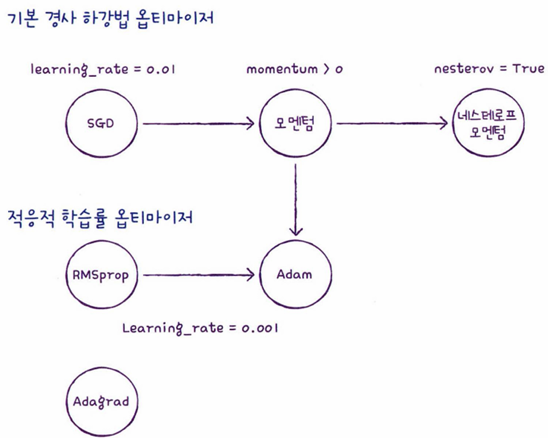

In [69]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [72]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [73]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Adam
- 모멘텀 최적화와 RMSPrOP의 장점을 접목한 것이 Adam. Adam은 RMSPrOP과 함께 맨처음 시도해 볼 수 있는 좋은 알고리즘. Adam 클래스도 keras.optimizers 패키지 아래에 있
음. 적응적 학습률을 사용하는 이 3개의 클래스는 learning_rate 매개변수의 기본값으로 모두 0.001을 사용.
- Adam 클래스의 매개변수 기본값을 사용해 패션 MNIST 모델 훈련

In [75]:
# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [76]:
# compile 메서드의 optimizer를 'adam'으로 설정하고 5번의 에포크동안 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7691 - loss: 0.6706
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8515 - loss: 0.4134
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8691 - loss: 0.3618
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8793 - loss: 0.3302
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8873 - loss: 0.3088


- -> 기본 RMSprop을 사용했을 때와 거의 같은 성능 보여줌

In [77]:
# RMSprop보다 조금 나은 성능
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8762 - loss: 0.3506


[0.35239022970199585, 0.8725833296775818]

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 7-3. 신경망 모델 훈련

## 손실 곡선
- 케라스의 fit() 메서드는 History 클래스 객체를 반환, 이 객체에는 훈련 과정에서 계산한 지표(손실과 정확도 값)가 저장돼있음.
- -> History 객체로 그래프를 그려보자

In [79]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [80]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [81]:
# if 구문의 역할: model_fn() 함수에 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가함.
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [82]:
model = model_fn()

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# verbose는 epoch 진행 막대 나타내는 건데, 0은 나타내지 않음(기본값은 1)
# fit() 메서드의 결과를 history 변수에 담음.
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [84]:
# history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 존재
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


- -> history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트
- -> 이것을 맷플롯립을 사용하여 표현 가능

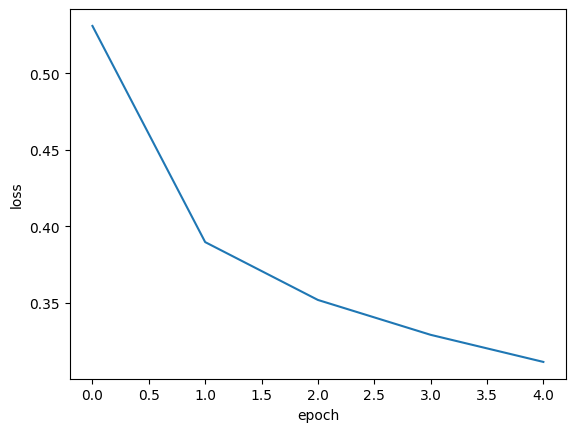

In [85]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

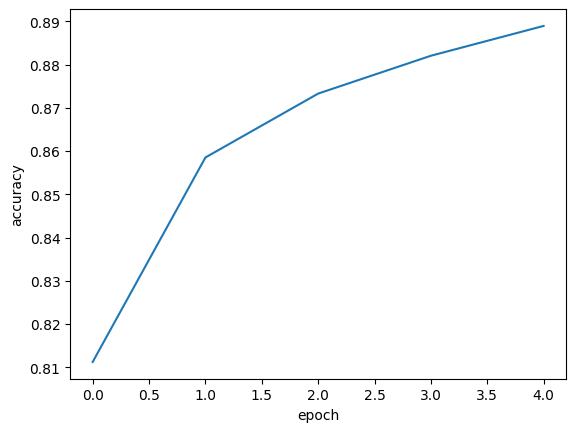

In [86]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

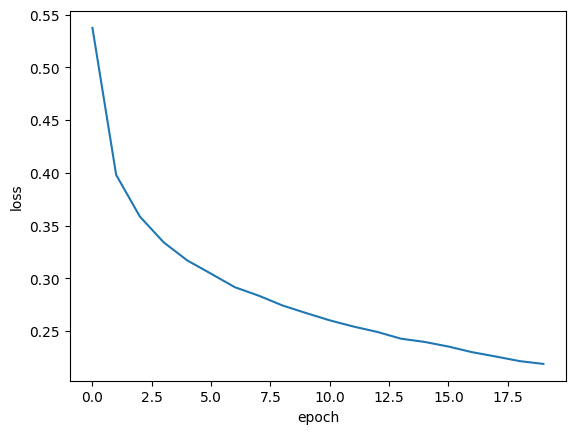

In [87]:
# 손실이 감소하고 있으니(잘 되고 있는 것.) 에포크 횟수를 20회로 늘리기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실
- 과대 적합, 과소 적합을 파악하려면 훈련 세트에 대한 점수 뿐만 아니라 검증 세트에 대한 점수도 필요함
- 앞에서처럼 훈련 세트의 손실만 그려서는 안됨!

In [88]:
# validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [89]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


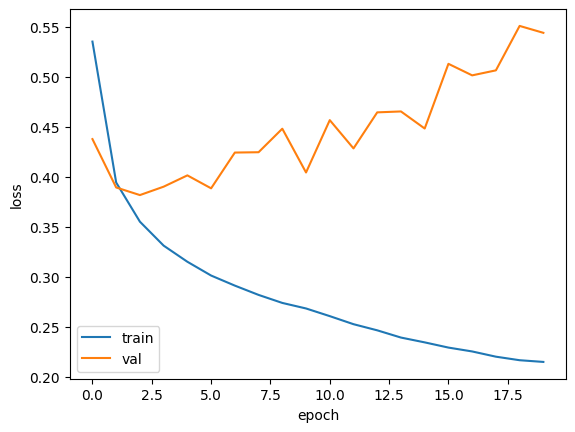

In [90]:
# 초기에 검증 손실 감소하닥 다섯 번째 에포크 만에 다시 상승하기 시작
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- -> 더 앞에서 했던 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델 만들어짐.
- -> 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실도 줄어들고, 검증 세트에 대한 정확도도 증가할 것이다.
- 과대적합을 막기 위하여 Adam 사용 (적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기 조정 가능)

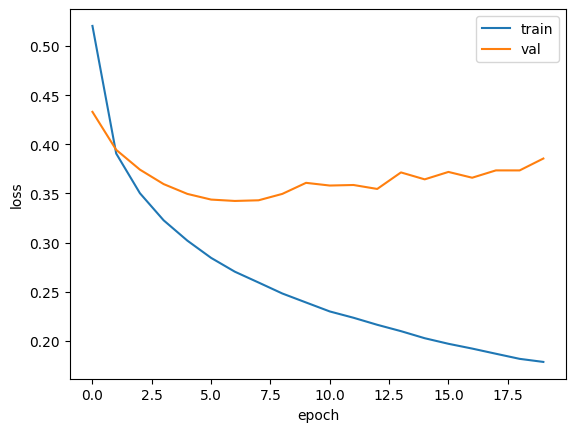

In [91]:
# Adam 사용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- -> 과대적합 훨씬 줄어듦

## 드롭아웃
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런의 출력을 0으로 만들어) 과대적합 막는 것
- = 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야함.
- 케라스에서는 keras.layers 패키지 아래 Dropout 클래스로 드롭아웃을 제공함
- 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듦
- 드롭아웃이 층처럼 사용되지만 훈련되는 모델 파라미터는 없음.
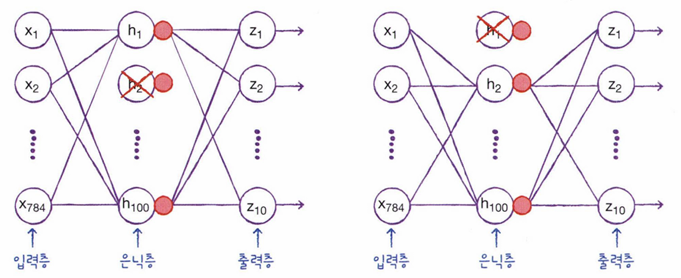

In [92]:
# 드롭아웃 객체를 전달하여 층을 추가하고, 30% 정도를 드롭아웃
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

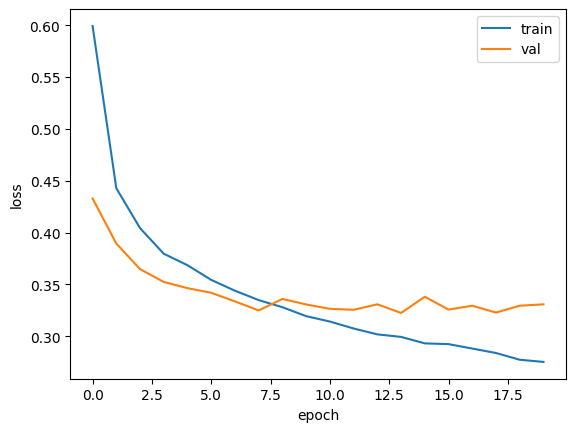

In [93]:
# 훈련이 끝난 뒤, 평가나 예측을 수행할 때는 드롭아웃 적용 x
# 텐서플로와 케라스는 평가와 예측 시 자동으로 드롭아웃을 적용하지 않음
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- -> 과대적합이 확실히 줄었음.
- 열 번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지되고 있음
- 하지만, 20번의 에포크동안 훈련을 했기 때문에 결국 다소 과대적합되어있을 것. (10으로 횟수 줄이고 다시 훈련하는 게 좋을듯하다)

## 모델 저장과 복원
- 케라스 모델은 모델 구조와 파라미터를 저장하는 save() 메서드 제공
- # 훈련된 모델의 파라미터만 저장하는 save_weights() 메서드도 제공

In [94]:
# 위의 훈련에서 에포크 횟수 10으로 줄여서 모델 다시 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [95]:
# 모델 저장
model.save('model-whole.keras')

In [96]:
# 훈련된 모델의 파라미터만 저장하는 save_weights() 메서드도 제공
model.save_weights('model.weights.h5')

In [97]:
# 생성 잘 됐는지 확인
!ls -al model*

-rw-r--r-- 1 root root 971928 Nov 30 14:33 model.weights.h5
-rw-r--r-- 1 root root 974767 Nov 30 14:33 model-whole.keras


훈련 1
- 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5파일에서 훈련된 모델 파라미터를 읽어서 사용

In [98]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [99]:
# 이 모델의 검증 정확도 확인
# 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환
# 검증 세트 크기 (12,000 , 10) -> 10개의 확률 중 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도 계산
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8804166666666666


훈련 2
- 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력
- 모델이 저장된 파일을 읽을 때는 케라스의 load_model() 사용

In [100]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8852 - loss: 0.3332


[0.3334396481513977, 0.8804166913032532]

- 위 과정에서 20번의 에포크 동안 모델을 훈련하여 검증 손실이 상승하는 지점을 확인하고 과대적합 되지 않는 에포크만큼 다시 훈련시킴
- -> 두 번 훈련하지 않고 한 번에 끝낼 수 없나? = '콜백'

## 콜백
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들
- ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장
- save_best_only=True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델 저장할 수 있음

In [101]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [102]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8856 - loss: 0.3163


[0.3167189061641693, 0.8848333358764648]

- ModelCheckpoint 콜백이 가장 낮은 검증 손실 모델을 자동으로 저장하지만, 여전히 20번의 에포크 동안 후녈함.
- 검증 점수가 상승하기 시작할 때, 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있음 = '조기 종료'

In [103]:
# 케라스는 조기 종료를 위해 EarlyStopping 콜백 제공
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, # 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
                                                  restore_best_weights=True) # 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [104]:
# 몇 번째 에포크에서 훈련 중지됐는지 알 수 있음
print(early_stopping_cb.stopped_epoch)

10


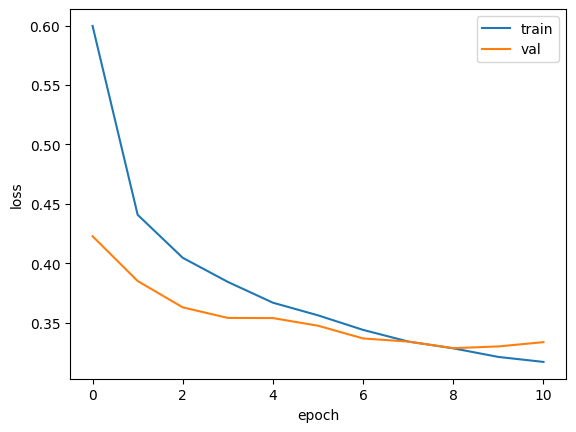

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [106]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8801 - loss: 0.3280


[0.3284827768802643, 0.878000020980835]

In [107]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/DA_week12.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DA_week12.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 1850825 bytes to /content/drive/MyDrive/Colab Notebooks/DA_week12.html
